<center><h1>Graph project: Epidemic spreading</h1></center>

<center><h4>ENSEEIHT SN</h4></center>

<div style="width:75%;margin:0 auto;">
    
## Introduction
<a id='intro'></a>
    
<p style="text-align:justify;"> As you know, a new epidemic has overwhelmed the world, COVID-19 jeopardizes people and changes our habits. It is easy to realise that knowing how illnesses spread is vital to our own protection. How can we predict whether a disease will cause an epidemic, how many people it will infect, which people it will infect, and whether or not it is dangerous to society as a whole ? Also, how can we determine which techniques to use in fighting an epidemic once it begins ? One way to answer all of these questions is through <strong>mathematical modeling</strong>. </p>

<p style="text-align:justify;"> In this work you will have to review different epidemic modelings relying all on the representation by graphs of a human network called a <strong>contact network</strong>. A vertex in a contact network represents an individual and an edge between two vertices represents a contact between two individuals. The disease only spread from individual to individual if they are in contact, so through the edges. This representation is actually really common in research, and a lot of state-of-the-art modeling are built over it. From these different models you will be asked to draw conclusions from experiments on varying contact networks</p>

<p style="text-align:justify;"> For readability and ease of use, this project will be carried on a Jupyter Notebook, hence code and question answering have to be written in this unique file. This is a <strong>DUO</strong> project, no group of one person will be accepted, the duo has to be composed of same TD group students, if the number of students in the TD group is odd we will accept one group composed of three students. It will be coded in Julia using the LightGraphs package. <strong>BEWARE:</strong> 
    
- If the code does not provide good results, its readability as well as its comments are essential for the corrector to potentially find some notation points.
- The specifications of the functions have to be strictly respected.
- Do not neglect written questions they stand for an important part of the notation, you are not only evaluated on the coding. Also, even so a written question may not ask you directly to code or provide results from code, support your arguments when possible with a runable example is very welcome and sometimes even expected.
- Any initiatives and additional efforts bringing contents and thoughts out of the question scope may result in bonus points if pertinent.
</p> 
    
<p style="text-align:justify;"> Deliverable: You will deliver your work on moodle before <strong style="font-size:1.3em">23.01.2022</strong> in a <strong style="font-size:1.3em">.tar</strong> containing the notebook with your codes and your written answers, and the different graph figures in .png you will generate. The corrector will use the student N7 computers for running your code, so take care of verifying that your work is running as expected on these computers !</p>

LightGraphs documentation: https://juliagraphs.org/LightGraphs.jl/v1.2/index.html
    
<!---
http://makie.juliaplots.org/stable/basic-tutorial.html#Adding-plots-to-a-Scene
TODO: afficher l'historique gplot des graphes durant la simu pour voir visuellement ce que ça donne. Peut etre necessiter de locker l'affichage graphique.
afficher pour tau fixer sur different graphe de degré le nombre max d'infecté durant la simu.
    
Faire coder le modèle SAIS et SIR

    Pour SIR faire la courbe dans un des sites dans les favoris
    
    Expliquer en quoi la distance et Jordan ne sont pas tout le temps optimal. Expliquer pourquoi le DMP peut présenter de meilleur résultat.

Demander d'imaginer d'autres modèle inspirer de maladie
--->

<div style="width:75%;margin:0 auto;">

## Environment and packages installation
<a id='env'></a>
    

<p style="text-align:justify;"> <strong>IMPORTANT</strong>: For evaluation, coding questions have to run with no additional packages ! Only the ones present here ! However if you want to use another package to go further in your answer and add bonus contents, take care of separating the cells and precising which packages you are using.</p>

In [1]:
using Pkg
#  Pkg.activate(".") # Path to Manifest.toml and Project.toml
#  Pkg.add("GraphPlot")
#  Pkg.add("Colors")
#  Pkg.add("CairoMakie")
#  Pkg.add("StatsBase")
#  Pkg.add("Plots")
#  Pkg.add("JLD2")
#  Pkg.add("Compose")
#  Pkg.add("Graphs")
#  Pkg.resolve()

In [2]:
# Import packages
using Pkg
# Pkg.activate(".") # Path to Manifest.toml and Project.toml
using GraphPlot
using Colors
using CairoMakie
using StatsBase
using Plots
using JLD2
using Compose
using Graphs

<div style="width:75%;margin:0 auto;">

## Part 1 - SIS model
<a id='part1'></a>

<p style="text-align:justify;">SIS is a compartmental model, ie a model where the population is divided into subgroups that represent the disease status of its members. SIS stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Susceptible where the susceptible group contains those who remain susceptible to the infection, and the infected group consists of those who not only have the disease but are also in the contagious period of the disease.</p>
    
<p style="text-align:justify;"> Combine with a contact network approach, this model can capture contact patterns (family, company, friends). Each vertex represents an individual in the host population, and contacts between two individuals are represented by an edge that connects the two. The probability of transmitting the disease from an infected to a susceptible individual along one of these edges or contacts is $\beta$ (=<strong>infection rate</strong>). The probability to cure is $\alpha$ (= <strong>curing rate</strong>). </p>

    
<p style="text-align:justify;">In order for a disease to begin spreading through a network, the disease must be introduced into the population, either through infecting a proportion of the population or through infecting one individual. As time moves forward, the disease will spread away from those initially infected, and two things may occur simultaneously at each time step $t$. First, each infected individual will spread disease to each of its contacts with a probability $\beta$. Secondly, each infectious individual will recover at a rate, $\alpha$ , at which point the individual will then no longer infect any of its contacts. After the disease has run its course, we can determine how the disease affected the network by calculating various quantities that help us better understand the outbreak.
</p>

<br>
    
<p style="font-size:0.9em">P. Van Mieghem, J. Omic, R. E. Kooij, <em>“Virus Spread in Networks”</em>,
IEEE/ACM Transaction on Networking (2009)<p>


<!---
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font size = 4.5px><b>Algorithm 1:</b> Girvan Newman</font><br>
    <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
    <b> WHILE </b> there are still edges<b> OR </b> desired nb of communities unreached <b>DO</b>
        <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
        Calculate betweeness of all edges <br>
        Remove the edge with the highest betweeness <br>
        Calculate the number of strongly connected components
        </div>
    <b> END WHILE </b>   
    </div>
</div>
--->

<div style="width:75%;margin:0 auto;">

### 1.1 Contact networks sample

In [3]:
"""karat7: A graph representing the karate club of N7 and the connections between the persons in this club.
There are 34 people in this network. It is actually inspired by one of the most famous problem in graph
theory: the Zachary's karate club.
"""
karat7 = smallgraph(:karate)
nodecolor = [colorant"lightseagreen"]
draw(PNG("karat7.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [4]:
"""n7_2A: A graph representing the second year students at N7. Each department (SN, MF2E, 3EA) form a 
community where connections are denser, connections between department are rarer.
"""
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
nodecolor = [colorant"lightseagreen"]
draw(PNG("n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [5]:
"""toulouse_neigh: A graph representing a neighborhood composed of 1000 people in Toulouse.
"""
toulouse_neigh = barabasi_albert(1000, 1)
nodecolor = [colorant"lightseagreen"]
draw(PNG("toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
  
### 1.2 Introduce the infection
    
<p style="text-align:justify;">We denote by <code>state</code> a vector containing the disease status of each vertex where Susceptible=0 and Infected=1. Then <code>state</code> is an <code>Array{Int32,1}</code> of length the number of vertices. This array in addition of a graph (represented internally by an adjacency matrix or an adjacency list) will be the data structure of our model.</p>
    
<span style="font-size:0.9em">In <code>Array{Int32,1}</code>, <code>Int32</code> refers to the kind of data in the array, here 32 bits integers, <code>1</code> refers to the dimension of the array, here we have a 1-dimensional structure so a vector.</span>

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 1 (code):</strong> For each graph in the graph sample (<code>karat7</code>, <code>n7_2A</code>, <code>toulouse_neigh</code>) initialize the state array by assigning each vertex to susceptible and add randomly one or numerous infected people. Save the graph as a .png image using <code>gplot</code> and <code>draw</code>, infected should appear in a different color (<code>colorant"orange"</code>).
    
Due to a bug on certain version of Jupyter Notebook, the graph <span style="font-size:1.3em">figures should be saved in a file and not plot inside the notebook </span> !!!
    
Gplot GitHub: https://github.com/JuliaGraphs/GraphPlot.jl
    
Gplot examples: https://juliagraphs.org/GraphPlot.jl/

In [6]:
# Infect Karat7
nbInfected = 4

function initialize_karat7(nbInfected)

    karat7 = smallgraph(:karate)
    n = nv(karat7)
    statusKarat7 = zeros(Int32, n)
    infected = [rand(1:n) for i in 1:nbInfected]
    nodecolor = fill(colorant"lightseagreen", n)

    for i in infected
        statusKarat7[i] = 1
        nodecolor[i] = colorant"orange"
    end

    return statusKarat7

end

draw(PNG("karat7.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))


In [7]:
# Infect N7_2A
nbInfected = 10

function initialize_N7_2A(nbInfected)

    c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
    nb=[100,70,50]
    n7_2A = stochastic_block_model(c,nb)

    n = nv(n7_2A)
    statusN7_2A = zeros(n)
    infected = [rand(1:n) for i in 1:nbInfected]
    nodecolor = fill(colorant"lightseagreen", n)

    for i in infected
        statusN7_2A[i] = 1
        nodecolor[i] = colorant"orange"
    end

    return statusN7_2A

end 

draw(PNG("n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [8]:
# Infect Toulouse_neigh
nbInfected = 100

function initialize_toulouse_neigh(nbInfected)

    toulouse_neigh = barabasi_albert(1000, 1)

    n = nv(toulouse_neigh)
    statusToulouse_neigh = zeros(n)
    infected = [rand(1:n) for i in 1:nbInfected]
    nodecolor = fill(colorant"lightseagreen", n)

    for i in infected
        statusToulouse_neigh[i] = 1
        nodecolor[i] = colorant"orange"
    end
    
    return statusToulouse_neigh
    
end

draw(PNG("toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 2 (written):</strong> What do you think/predict about the influence of the initial number of infected people and their locations on the evolution of an SIS model epidemic ?

<br>

<strong>Answer:</strong>
The more infected people there are at the beginning, the faster the disease will spread. Moreover, the more initially infected people have connections and the more densely connected their area of the graph is, the faster the disease will spread.
</div>

<div style="width:75%;margin:0 auto;">
  
### 1.3 Spread the infection

<div style="width:75%;margin:0 auto;">
      
<strong style="color:cornflowerblue">Question 3 (code):</strong> Implement the <code>function SIS</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$.
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIS(net,state,beta,alpha,t)</code> with your code.</span>

In [9]:
function SIS(net,state,beta,alpha,t)
    """Take a contact network at a certain state and apply t time steps
    of an SIS model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """     
    n = nv(net)
    graphVertices = vertices(net)

    statecopy = deepcopy(state)

    for i in 1:t

        for iv in 1:n

            if state[iv] == 1
                graphNeighbors = neighbors(net, graphVertices[iv])
                for ne in graphNeighbors
                    # beta chances to be infected
                    if rand() < beta
                        statecopy[ne] = 1
                    end 

                end

                # alpha chances to be curated
                statecopy[iv] = rand() < alpha ? 0 : 1
            end

        end

        state = deepcopy(statecopy)

    end

    return state

end

SIS (generic function with 1 method)

In [10]:
function colorNodes(state)

    n = length(state)
    nodecolor = fill(colorant"lightseagreen", n)

    for i in 1:n
        if state[i] == 1 
            nodecolor[i] = colorant"orange"
        elseif state[i] == 2
            nodecolor[i] = colorant"purple"
        elseif state[i] == 3
            nodecolor[i] = colorant"lightgreen"
        end
    end
    
    return nodecolor

end

colorNodes (generic function with 1 method)

In [11]:
# Test on Karat7
karat7 = smallgraph(:karate)
beta = 0.40
alpha = 0.30
t = Int32(100)
nbInfected = 4
statusKarate7 = initialize_karat7(nbInfected)
stateKarat7 = SIS(karat7,statusKarate7,beta,alpha,t)

nodecolor = colorNodes(stateKarat7)

draw(PNG("karat7Infected_t10.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [12]:
# Test on N7_2A
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
nb=[100,70,50]
n7_2A = stochastic_block_model(c,nb)
beta = 0.40
alpha = 0.30
t = Int32(10)
nbInfected = 10
statusN7_2A = initialize_N7_2A(nbInfected)
stateN7_2A = SIS(n7_2A,statusN7_2A, beta, alpha, t)

nodecolor = colorNodes(stateN7_2A)

draw(PNG("n7_2A_t10.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [13]:
# Test on Toulouse_neigh
toulouse_neigh = barabasi_albert(1000, 1)
beta = 0.40
alpha = 0.30
t = Int32(10)
nbInfected = 100
statusToulouse_neigh = initialize_toulouse_neigh(nbInfected)
stateToulouse_neigh = SIS(toulouse_neigh,statusToulouse_neigh, beta, alpha, t)

nodecolor = colorNodes(stateToulouse_neigh)

draw(PNG("toulouse_neigh_t10.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">

### 1.4 Simulate and understand the epidemic
    
<p style="text-align:justify;">In the SIS model of this project, every disease is characterized by:
    
* The infection rate $\beta$ representing the chance of infection when being in contact with an infected individual.
* The curing rate $\alpha$ representing the chance of being cured of the disease.
* The effective spreading rate $\tau=\frac{\beta}{\alpha}$ representing the capacity of the disease to spread. More the disease infect easily ($\beta$ high) and less it is cured easily ($\alpha$ low) more $\tau$ can be high.

We are now willing to understand what are the influences of these parameters as well as the contact network shape on an epidemic.</p>

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 4 (written):</strong> The <code>function SIS</code> you implemented launches one run of an SIS model on a given contact network. As it makes use of randomness, one run of spreading is stochastic. Then what simple method can you propose to provide a prediction of the disease spreading on a given contact network ?
   
<br>
    
<Strong>Answer:</Strong> We can launch multiple simulations with the SIS model and compute the average number of infected people. Then we have a prediction of the disease spreading on a given contact network. </div>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 5 (code):</strong> Implement the <code>function Simulation_SIS</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [14]:
function Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIS over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,2}): the prediction of the percentage of 
            infected at each time step and for each disease. The 
            first dimension contains the time steps and the second
            contains the diseases
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    n = nv(net)
    diseases = length(betas)
    prediction = zeros(t,diseases)
 
    for i in 1:diseases
        for simu in 1:nbsimu

            initState = zeros(n)
            infected = [rand(1:n) for i in 1:nbinf]
            for infect in infected
                initState[infect] = 1
            end
            state = initState

            for time in 1:t
                state = SIS(net, state, betas[i], alphas[i], 1)
                prediction[time,i] += sum(state)
            end
        end
    end

    # Moyenne de toutes les simulations
    prediction = prediction/nbsimu

    effectiveSpreadingRate = zeros(diseases)
    for i in 1:diseases
        effectiveSpreadingRate[i] = betas[i]/alphas[i]
    end

    return prediction/n, effectiveSpreadingRate

end

Simulation_SIS (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 6 (written)</strong>: Run the 2 scripts below and describe what you see. Conclude on the influence of $\tau$, $\beta$, and $\alpha$ on an epidemic we can model with SIS.
    
<br>
    
<div> <strong>Answer:</strong> 

For constant values of $\tau$ the final infection rate stays approximately constant, however, the lower the values of $\alpha$ and $\beta$ (for $\tau$ constant) the slower the infection will spread. 

When $\tau$ increases however the final infection rate increases and tends to one when $\tau$ tends to infinity. Moreover when $\tau$ is small enough the infection rate decreases with time.
</div>

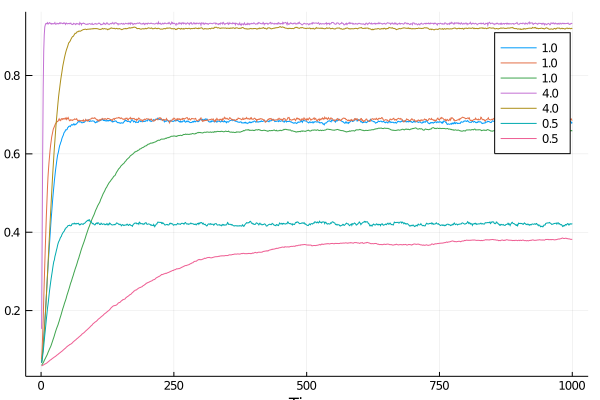

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [15]:
# Script launching predictions on different diseases on karat7 and printing 
# the precentage of infected at each time step.
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

predictions, taus = Simulation_SIS(karat7,2,betas,alphas,1000,1000)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")



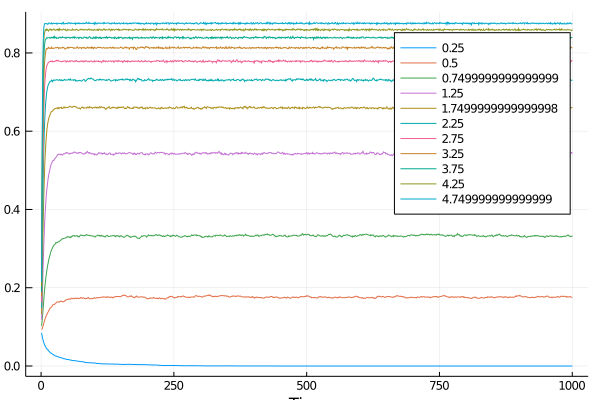

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [16]:
# Same as before but applied on toulouse_neigh. May be a bit long to run.
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,1000,100)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 7 (written):</strong> Change the initial number of infected in the scripts above, is it in accordance with your answer in Question 2 ?
    
<br>
    
<div> <strong>Answer:</strong>

As according to question 2 we can see that the more there is of infected people originally the faster the disease spreads and reaches the final infection rate.

</div>

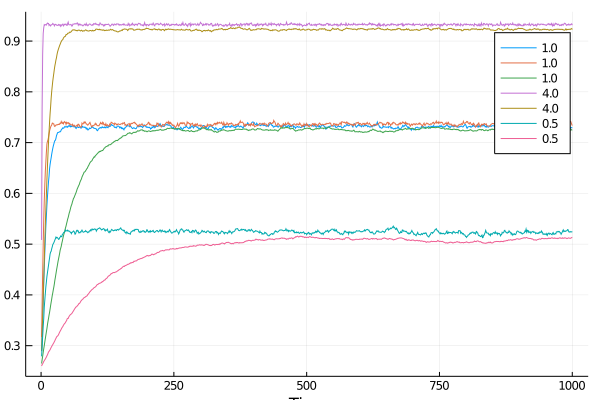

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [17]:
# Change the initial number of infected
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

predictions, taus = Simulation_SIS(karat7,10,betas,alphas,1000,1000)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 8 (code):</strong> Implement a script plotting the maximum percentage of infected people according to $\tau$ over 300 time steps for 3 contact networks:

* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.

You can use the function <code>random_regular_graph(n,d)</code> of LighGraphs. As you probably need to use a certain number of different values of $\tau$ to visualize something interesting (the more there are the more the figure will be smooth) you should fix $\alpha$ and make $\beta$ vary. 

<span style="font-size:0.9em">A regular graph is a graph where each vertex has the same degree.</span>

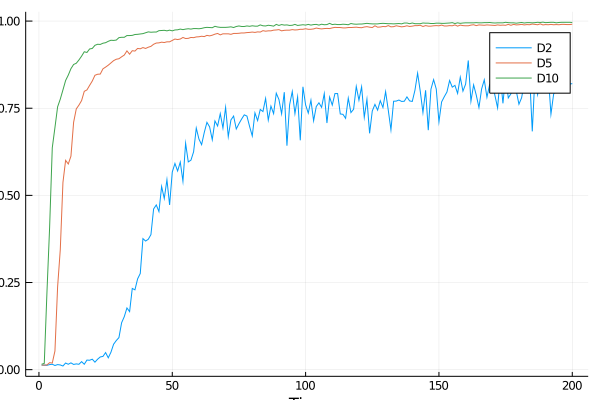

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [18]:
# Plots of the maximum percentage of infected people according to tau over 300 time 
# steps for 3 contact networks.

graph_d2 = random_regular_graph(200,2)
graph_d5 = random_regular_graph(200,5)
graph_d10 = random_regular_graph(200,10)
nb_plot = 200
nbinf = 3
nbsimu = 10

betas = zeros(1)
alphas=[0.1]
result = zeros(nb_plot, 3)
inc = 1/nb_plot

for i in 1:nb_plot
    betas[1] = betas[1] + inc
    predictions_d2, taus = Simulation_SIS(graph_d2,nbinf,betas,alphas,300,nbsimu)
    predictions_d5, _ = Simulation_SIS(graph_d5,nbinf,betas,alphas,300,nbsimu)
    predictions_d10, _ = Simulation_SIS(graph_d10,nbinf,betas,alphas,300,nbsimu)
    
    result[i, 1] = maximum(predictions_d2)
    result[i, 2] = maximum(predictions_d5)
    result[i, 3] = maximum(predictions_d10)
end


Plots.plot(result, label=["D2" "D5" "D10"],xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 9 (written):</strong> Describe the figure and draw conclusions on the epidemic behavior for different degrees $d$ on regular graphs. Thus, in addition of the inner properties of the disease ($\alpha$, $\beta$, $\tau$) what other parameter is essential in the spreading ? Finally, what analogy can be done with real life from this experiment ?
    
<br>
    
<div> <strong>Answer:</strong>

We observe that the higher the degree of the graph, the fastest is the spread of the disease. It is related to the fact that the more an infected person has contacts with other people the higher the chances are that said person will spread the disease. The degree of the vertices are, therefore, another important parameter essential to the spreading. In this case the degree of the vertices represents the number of people each person is in contact with.

</div>

<div style="width:75%;margin:0 auto;">

## Part 2 - SIR and SAIR model
<a id='part2'></a>
    
<p style="text-align:justify;">Unfortunately SIS model is valuable for diseases we can catch back since a cured person can get ill again. This is true for the flu, the cold, etc. However COVID-19 might create immunity for whom already got it and SIS can not take into account immune or dead persons. That is why we propose in this part to consider another model more adapted to COVID-19 called SIR. It stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Recovered where the susceptible group contains those who remain susceptible to the infection, the infected group consists of those who not only have the disease but are also in the contagious period of the disease, and the recovered group contains those who were ill, got cured, are not contagious and can not get ill anymore.</p>

<br>

<p style="font-size:0.9em">M. Youssef and C. Scoglio, <cite>"An individual-based approach to SIR epidemics in contact networks"</cite>, Journal of Theoretical Biology 283 (2011)</p>

<br>
    
<p style="text-align:justify;"> One limitation of SIR is that it does not model the reaction of humans when they feel the presence of the epidemic. Indeed, if feeling threaten or surrounded by infected, an individual may change its behaviors: wear mask, wash its hands, etc. This result in a smaller infection rate. That is why in this part we will also consider a variant of SIR called SAIR which stands for Susceptible $\rightarrow$ Alert $\rightarrow$ Infected $\rightarrow$ Recovered. A susceptible individual becomes infected by the infection rate $\beta_0$, an infected individual recovers and gets immune by the curing rate $\alpha$, an individual can observe the states of its neighbors, then a susceptible individual might go to the alert state if surrounded by infected individuals with an alert rate $\kappa$ on each contact with an infected, an alert inividual becomes infected by the infection rate $\beta_1$ where $0<\beta_1<\beta_0$. In our simple SAIR model, an individual can not go back to a susceptible state when he got into the alert state.</p>
    
<br>
    
<p style="font-size:0.9em"> F. Darabi Sahneh and C. Scoglio, <cite>"Epidemic Spread in Human Networks"</cite>, 50th IEEE Conf. Decision and Contol, Orlando, Florida (2011)</p>

<div style="width:75%;margin:0 auto;">

### 2.1 SIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, and Recovered=2.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 10 (code):</strong> Implement the <code>function SIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Recovered vertices should appear in a different color (<code>colorant"purple"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIR(net,state,beta,alpha,t)</code> with your code.</span>

In [19]:
function SIR(net,state,beta,alpha,t)
    """Take a contact network at a certain state and apply t time steps
    of an SIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """

    n = nv(net)
    graphVertices = vertices(net)

    statecopy = deepcopy(state)

    for i in 1:t

        for iv in 1:n

            if state[iv] == 1
                graphNeighbors = neighbors(net, graphVertices[iv])
                for ne in graphNeighbors
                    # beta chances to be infected
                    if rand() < beta && state[ne] != 2
                        statecopy[ne] = 1
                    end 

                end

                # alpha chances to be curated
                statecopy[iv] = rand() < alpha ? 1 : 2
            end

        end

        state = deepcopy(statecopy)

    end

    return state

end

SIR (generic function with 1 method)

In [20]:
# Test on Karat7
karat7 = smallgraph(:karate)
beta = 0.40
alpha = 0.30
t = Int32(10)
nbInfected = 4
statusKarate7 = initialize_karat7(nbInfected)
stateKarat7 = SIR(karat7,statusKarate7,beta,alpha,t)

nodecolor = colorNodes(stateKarat7)

draw(PNG("karat7Infected_SIR_t10.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [21]:
# Test on N7_2A
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
nb=[100,70,50]
n7_2A = stochastic_block_model(c,nb)
beta = 0.40
alpha = 0.30
t = Int32(10)
nbInfected = 10
statusN7_2A = initialize_N7_2A(nbInfected)
stateN7_2A = SIR(n7_2A,statusN7_2A, beta, alpha, t)

nodecolor = colorNodes(stateN7_2A)

draw(PNG("n7_2A_SIR_t10.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [22]:
# Test on Toulouse_neigh
toulouse_neigh = barabasi_albert(1000, 1)
beta = 0.40
alpha = 0.30
t = Int32(10)
nbInfected = 100
statusToulouse_neigh = initialize_toulouse_neigh(nbInfected)
stateToulouse_neigh = SIR(toulouse_neigh,statusToulouse_neigh, beta, alpha, t)

nodecolor = colorNodes(stateToulouse_neigh)

draw(PNG("toulouse_neigh_SIR_t10.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 11 (code):</strong> Implement the <code>function Simulation_SIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [23]:
function Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    n = nv(net)
    diseases = length(betas)
    prediction = zeros(t,diseases,3)
 
    for i in 1:diseases
        for simu in 1:nbsimu

            initState = zeros(n)
            infected = [rand(1:n) for i in 1:nbinf]
            for infect in infected
                initState[infect] = 1
            end
            state = initState

            for time in 1:t
                state = SIR(net, state, betas[i], alphas[i], 1)
                for st in 1:n
                    if state[st] == 1
                        prediction[time,i, 1] += 1
                    elseif state[st] == 2
                        prediction[time,i, 2] += 1
                    else
                        prediction[time,i, 3] += 1
                    end
                end
            end
        end
    end

    # Moyenne de toutes les simulations
    prediction = prediction/nbsimu

    effectiveSpreadingRate = zeros(diseases)
    for i in 1:diseases
        effectiveSpreadingRate[i] = betas[i]/alphas[i]
    end

    return prediction/n, effectiveSpreadingRate
end

Simulation_SIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 12 (written):</strong> Run the script below and describe what you see. Why the infected curve does not behave the same as for SIS ? 
    
<br>

<div> <strong>Answer:</strong>

In the following figure, we can see that the number of infected people first increases in what we could call a spreading phase before decreasing in a contraction phase. The percentage of recovered people however gets close to 100% since a person who has recovered cannot get sick again. Consequently the number of susceptible people gets close to 0. This is the reason that explains the difference in behavior compared to the SIS model. In the spreading rate, the infected people are neighbors with mostly susceptible persons and therefore the disease spreads. But since any infected person has a non zero chance of healing and that a cured person cannot get sick again, eventually infected persons are mainly surrounded by immune persons and cannot spread the disease further, that is the contraction phase.

</div>

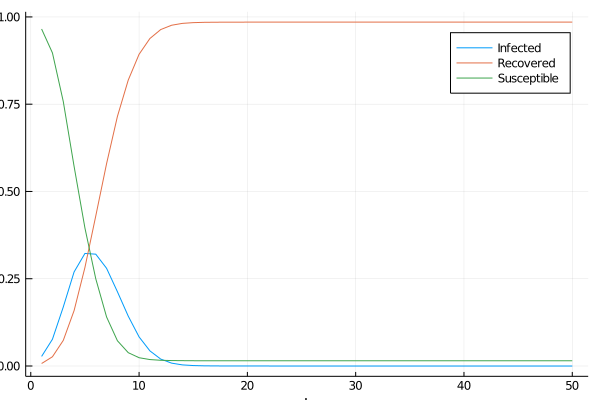

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [24]:
# Script launching prediction on one disease on n7_2A and plotting the percentage
# of infected, susceptible and recovered at each time step.
predictions, taus = Simulation_SIR(n7_2A,2,[0.3],[0.2],50,1000)

Plots.plot([predictions[:,:,1] predictions[:,:,2] predictions[:,:,3]],
           label=["Infected" "Recovered" "Susceptible"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 13 (written):</strong> As for Question 6 script 2 plot the evolution of the percentage of infected for many $\tau$. Describe what you see.
    
<br>
    
<div> <strong>Answer:</strong>

We can see that the higher is $\tau$ the higher the infection spike will be (maximum infected percentage). Moreover if $\tau$ is too low, there is no propagation phase and the number of infected immediately drops.

</div>

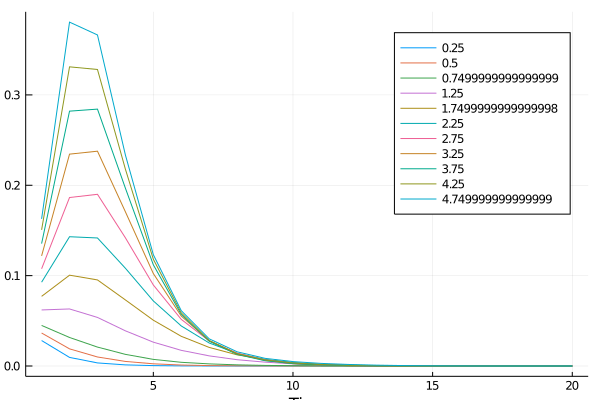

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [25]:
# Equivalent experiment as for Question 6 script 2
# Same as before but applied on toulouse_neigh. May be a bit long to run.
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIR(toulouse_neigh,100,betas,alphas,20,1000)

Plots.plot(predictions[:,:,1], label=taus',xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 14 (code):</strong> Implement a script plotting the number of infected over 75 time steps for $\beta=0.3$ and $\alpha=0.2$ fixed and on 3 contact networks:
    
* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.
    

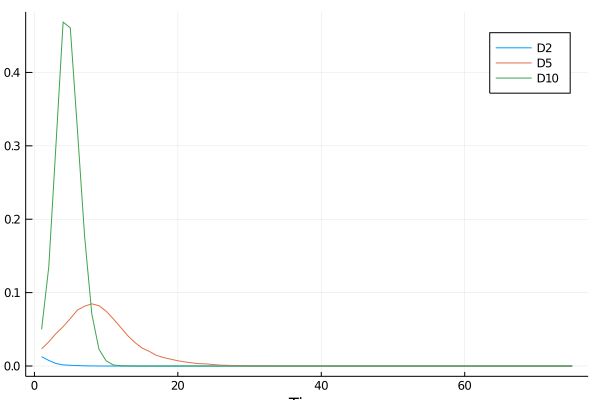

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [26]:
# Plots of the number of infected people according to tau over 75 time 
# steps for 3 contact networks.

graph_d2 = random_regular_graph(200,2)
graph_d5 = random_regular_graph(200,5)
graph_d10 = random_regular_graph(200,10)
nbinf = 3
nbsimu = 100

betas = [0.3]
alphas=[0.2]

predictions_d2, _ = Simulation_SIR(graph_d2,nbinf,betas,alphas,75,nbsimu)
predictions_d5, _ = Simulation_SIR(graph_d5,nbinf,betas,alphas,75,nbsimu)
predictions_d10, _ = Simulation_SIR(graph_d10,nbinf,betas,alphas,75,nbsimu)


Plots.plot([predictions_d2[:,:,1] predictions_d5[:,:,1] predictions_d10[:,:,1]], label=["D2" "D5" "D10"],xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 15 (written):</strong> From the previous figure, explain why lockdown can be interesting when hospital places are lacking ?

<br>
    
<div> <strong>Answer:</strong>

The previous figure shows that reducing the number of neighbors of each person results in lower pick contamination, eliminating the propagation phase altogether if it is reduced enough. Moreover it delays the contamination spike. Since locks down are causing a drop in connection between people (what we modelize by neighbors) they should have the same effect of reducing and delaying the infection spike, reducing the strain put on the hospitals and granting them more time to prepare.

</div>

<div style="width:75%;margin:0 auto;">

### 2.2 SAIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, Recovered=2, and Alert=3.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 16 (code):</strong> Implement the <code>function SAIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Alerted vertices should appear in a different color (<code>colorant"lightgreen"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SAIR(net,state,beta0,beta1,alpha,kappa,t)</code> with your code.</span>

In [27]:
function SAIR(net,state,beta0,beta1,alpha,kappa,t)
    """Take a contact network at a certain state and apply t time steps
    of an SAIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta0 (Float64): infection rate when not alert
       beta1 (Float64): infection rate when alert
       alpha (Float64): curing rate
       kappa (Float64): alerting rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """      
    n = nv(net)
    graphVertices = vertices(net)

    statecopy = deepcopy(state)

    for i in 1:t

        for iv in 1:n

            if state[iv] == 1
                graphNeighbors = neighbors(net, graphVertices[iv])
                for ne in graphNeighbors
                    # beta chances to be infected
                    alea = rand()
                    if state[ne] == 0
                        if alea < beta0
                            statecopy[ne] = 1
                        elseif rand() < kappa
                            statecopy[ne] = 3
                        end
                    elseif state[ne] == 3
                        if alea < beta1
                            statecopy[ne] = 1
                        end
                    end 

                end

                # alpha chances to be curated
                statecopy[iv] = rand() < alpha ? 1 : 2
            end

        end

        state = deepcopy(statecopy)

    end

    return state
end

SAIR (generic function with 1 method)

In [28]:
# Test on Karat7
karat7 = smallgraph(:karate)
beta0 = 0.40
beta1 = 0.30
alpha = 0.30
kappa = 0.20
t = Int32(100)
nbInfected = 4
statusKarate7 = initialize_karat7(nbInfected)
stateKarat7 = SAIR(karat7,statusKarate7,beta0, beta1, alpha, kappa, t)

nodecolor = colorNodes(stateKarat7)

draw(PNG("karat7Infected_SAIR_t10.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [29]:
# Test on N7_2A
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
nb=[100,70,50]
n7_2A = stochastic_block_model(c,nb)
beta0 = 0.40
beta1 = 0.30
alpha = 0.30
kappa = 0.20
t = Int32(10)
nbInfected = 10
statusN7_2A = initialize_N7_2A(nbInfected)
stateN7_2A = SAIR(n7_2A,statusN7_2A,beta0, beta1, alpha, kappa, t)

nodecolor = colorNodes(stateN7_2A)

draw(PNG("n7_2A_SAIR_t10.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [30]:
# Test on Toulouse_neigh
toulouse_neigh = barabasi_albert(1000, 1)
beta0 = 0.40
beta1 = 0.30
alpha = 0.30
kappa = 0.20
t = Int32(10)
nbInfected = 100
statusToulouse_neigh = initialize_toulouse_neigh(nbInfected)
stateToulouse_neigh = SAIR(toulouse_neigh,statusToulouse_neigh,beta0, beta1, alpha, kappa, t)

nodecolor = colorNodes(stateToulouse_neigh)

draw(PNG("toulouse_neigh_SAIR_t10.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 17 (code):</strong> Implement the <code>function Simulation_SAIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)</code> with your code.</span>

In [31]:
function Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SAIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas0 (Array{Float64,1}): array of infection rate when not alert on edges
       betas1 (Array{Float64,1}): array of infection rate when alert on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       kappas (Array{Float64,1}): array of alerting rate on edges
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    n = nv(net)
    diseases = length(betas)
    prediction = zeros(t,diseases,3)
 
    for i in 1:diseases
        for simu in 1:nbsimu

            initState = zeros(n)
            infected = [rand(1:n) for i in 1:nbinf]
            for infect in infected
                initState[infect] = 1
            end
            state = initState

            for time in 1:t
                state = SAIR(net, state, betas0[i], betas1[i], alphas[i], kappas[i], 1)
                for st in 1:n
                    if state[st] == 1
                        prediction[time,i, 1] += 1
                    elseif state[st] == 2
                        prediction[time,i, 2] += 1
                    else
                        prediction[time,i, 3] += 1
                    end
                end
            end
        end
    end

    # Moyenne de toutes les simulations
    prediction = prediction/nbsimu

    effectiveSpreadingRate = zeros(diseases)
    for i in 1:diseases
        effectiveSpreadingRate[i] = betas[i]/alphas[i]
    end

    return prediction/n, effectiveSpreadingRate

end

Simulation_SAIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 18 (written):</strong> Run the script below comparing the number of infected of SAIR and SIR and comment what you see.
    
<br>
    
<strong>Answer:</strong>   

According to the predictions, we observe that the percentage of infected at each time step for SIR and SAIR is raising until it spikes. Then the difference between the SAIR prediction and the SIR one can be found in the slope of the infection rate in the time. As some people become alerted when a neighbor get infected (instead of being either susceptible or infected), the rate of infection people drops faster with the SAIR method. Indeed, once someone is alerted, the probability to become infected is lower then the one when being susceptible and not alerted. Therefore there are more people "protected" in the SAIR model compared to the SIR model. Hence the faster drop of the infection rate of the SAIR model. </div>

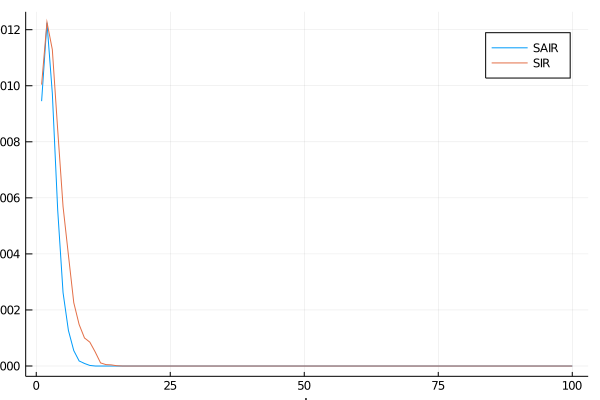

/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/alice/.julia/packages/GR/Atztx/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect 

In [32]:
# Script launching prediction on one disease on toulouse_neigh and plotting the percentage
# of infected at each time step for SIR and SAIR.
predictions1, taus1 = Simulation_SAIR(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],100,1000)
predictions2, taus2 = Simulation_SIR(toulouse_neigh,2,[0.2],[0.1],100,1000)

Plots.plot([predictions1[:,:,1] predictions2[:,:,1]],
           label=["SAIR" "SIR"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 19 (written):</strong> Of course the presented SIS, SIR, and SAIR models are limitated in their modelization of the reality. Formulate few of these limitations (at least 2). 
Propose few algorithm addons/ideas (at least 2) which would make the models more complex and more accurate in regards to the reality.
    
<br>
    
<strong>Answer:</strong> 

- Contrary to the reality, each person keeps the same neighbour during all the simulation. In real life, an infected person can be in contact with different neighbours and not only the same ones. Therefore we should make predictions on a dynamic graph instead of the current graph. 

- Moreover, in the presented models, we consider that once someone has been infected he becomes recovered and therefore he cannot be reinfected anymore. In the reality, the immunity is alleviated with time. That's why even though the person already got infected, there is still an increasing probality with time to become infected again. To make the model more accurate, we could add a probability, which is proportionnal to the time, to get infected again. </div>

<div style="width:75%;margin:0 auto;">

## Part 3 - Discover patient zero
    
<p style="text-align:justify;"> In the two previous parts you may have realised that understanding and controlling the spread of epidemics on contact networks is an important task. However, information about
the origin of the epidemic could be also extremely useful to reduce or prevent future outbreaks. Thus, in this part we will focus on algorithm solutions to answer this issue.</p>
    
<p style="text-align:justify;"> The stochastic nature of infection propagation makes the estimation of the epidemic origin intrinsically hard: indeed, different initial conditions can lead to the same configuration at the observation time. Methods such as the distance centrality or the Jordan center try to approximate it. They both rely on spatial information by stating that the first infected is probably at the center of the cluster of infection. Mathematically:
    
* The jordan center is expressed as $\min_{v\in \mathcal{I}}\max_{n\in \mathcal{I}}d(v,n)$ where $\mathcal{I}$ is a connected component of the original contact network containing all infected and recovered vertices, and where $d(\cdot,\cdot)$ is the distance (= the shortest path) between 2 vertices (if not weighted graph each edge accounts for 1 unit). 
* The distance centrality is expressed as $\min_{v\in \mathcal{I}}\sum_{n\in \mathcal{I}}d(v,n)(\delta_{n,I} + \delta_{n,R}/\alpha)$, where $\delta_{n,I}=1$ if the vertex n is infected ($=0$ otherwise), and where $\delta_{n,R}=1$ if the vertex n is recovered ($=0$ otherwise). You may note that in distance centrality we increase the weight of the recovered vertices by a factor $1/\alpha$, it translates the fact that recovered vertices tend to be closer to the origin of the epidemic since they probably got ill before.
    
    
We formulate the problem as follow: given a contact network and a snapshot of epidemic spread at a certain time, determine the infection source. A snapshot is a given <code>state</code> array for a contact network.</p>

<br>
    
<p style="font-size:0.9em"> A. Y. Lokhov, M. Mézard, H. Ohta, and L. Zdeborová, <cite>"Inferring the origin of an epidemic with a dynamic message-passing algorithm"</cite>, Physical Review (2014)</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 20 (code):</strong> Implement the <code>function jordan</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = jordan(g,state,alpha)</code> with your code.</span>

In [60]:
function jordan(g,state)
    """Find patient zero by mean of the jordan center method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    
    n = length(state)
    distance = zeros(n)
    alpha_inv = 1/alpha
    normalizedSate = zeros(n)
    for i in 1:n
        if state[i] == 1 || state[i] == 2
            normalizedSate[i] = 1
        end
    end

    for v in 1:nv(g)
        dijktra = dijkstra_shortest_paths(g, v)
        for dv in 1:nv(g)
            if dv != v
                distance[v] = max(distance[v], dijktra.dists[dv] * normalizedSate[dv])
            end
        end
    end
    return findmin(distance)[2]
    
end

jordan (generic function with 1 method)

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 21 (code):</strong> Implement the <code>function distance</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = distance(g,state,alpha)</code> with your code.</span>

In [61]:
function distance(g,state,alpha=1.)
    """Find patient zero by mean of the distance centrality method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
        alpha (Float64): curing rate
    
    RETURNS
        (Int32): the patient zero vertex number 
    """

    n = length(state)
    distance = zeros(n)
    alpha_inv = 1/alpha
    normalizedSate = zeros(n)
    for i in 1:n
        if state[i] == 1
            normalizedSate[i] = 1
        elseif state[i] == 2
            normalizedSate[i] = alpha_inv
        end
    end

    for v in 1:nv(g)
        dijktra = dijkstra_shortest_paths(g, v)
        for dv in 1:nv(g)
            if dv != v
                distance[v] = distance[v] + dijktra.dists[dv] * normalizedSate[dv]
            end
        end
    end
    return findmin(distance)[2]

end

distance (generic function with 2 methods)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 22 (written):</strong> Run the 3 following scripts using your functions <code>jordan</code> and <code>distance</code> and comment on the results.
    
The contact network is karat7 for 2 different patient zero and a $50\times 50$ grid. The real patient zero ("Z"), your jordan ("J") and distance ("D") approximations are appearing in <code>colorant"lightblue"</code>.
    
<br>
    
<strong> Answer:</strong>

We observe the two proposed methods are giving good approximation of the location of the patient zero. Although the distance method is more accurate than the jordan one. This can be explained by the more refined model of the distance method compared to the jordan one as it gives more importance to the recovered individuals since they must have been infected earlier.
</div>

In [62]:

# Loading a snapshot of karat7
@load "karat7_Q22_1.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.smallgraph(:karate)

# n = nv(g)
# print(n)
# state = zeros(n)
# nbInfected = 1
# infected = [rand(1:n) for i in 1:nbInfected]
# for i in infected
#     state[i] = 1
# end
# pat_zero = infected[1]

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_1.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/alice/.julia/packages/JLD2/qncOK/src/data/reconstructing_datatypes.jl:450


In [63]:
# # Loading a snapshot of karat7
@load "karat7_Q22_2.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.smallgraph(:karate)

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_2.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/alice/.julia/packages/JLD2/qncOK/src/data/reconstructing_datatypes.jl:450


In [64]:
# Loading a snapshot of grid50
@load "grid50_Q22.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.grid([50,50])

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("grid50_Q22.png", 100cm, 100cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/alice/.julia/packages/JLD2/qncOK/src/data/reconstructing_datatypes.jl:450
